In [147]:
# Set environment variable
import os

os.environ["USE_DD_PILLOW"]="False"
os.environ["USE_DD_OPENCV"]="True"

In [148]:
import cv2
from pathlib import Path
from matplotlib import pyplot as plt
from IPython.core.display import HTML

import deepdoctection as dd

In [149]:
# available models
# dd.ModelCatalog.get_profile_list()

[ WARN:0@5999.636] global loadsave.cpp:248 findDecoder imread_('/home/fiastros/Documents/OCR/Expirements/data/input_ invoice/rotated_image1.jpg'): can't open/read file: check file path/integrity


TypeError: Image data of dtype object cannot be converted to float

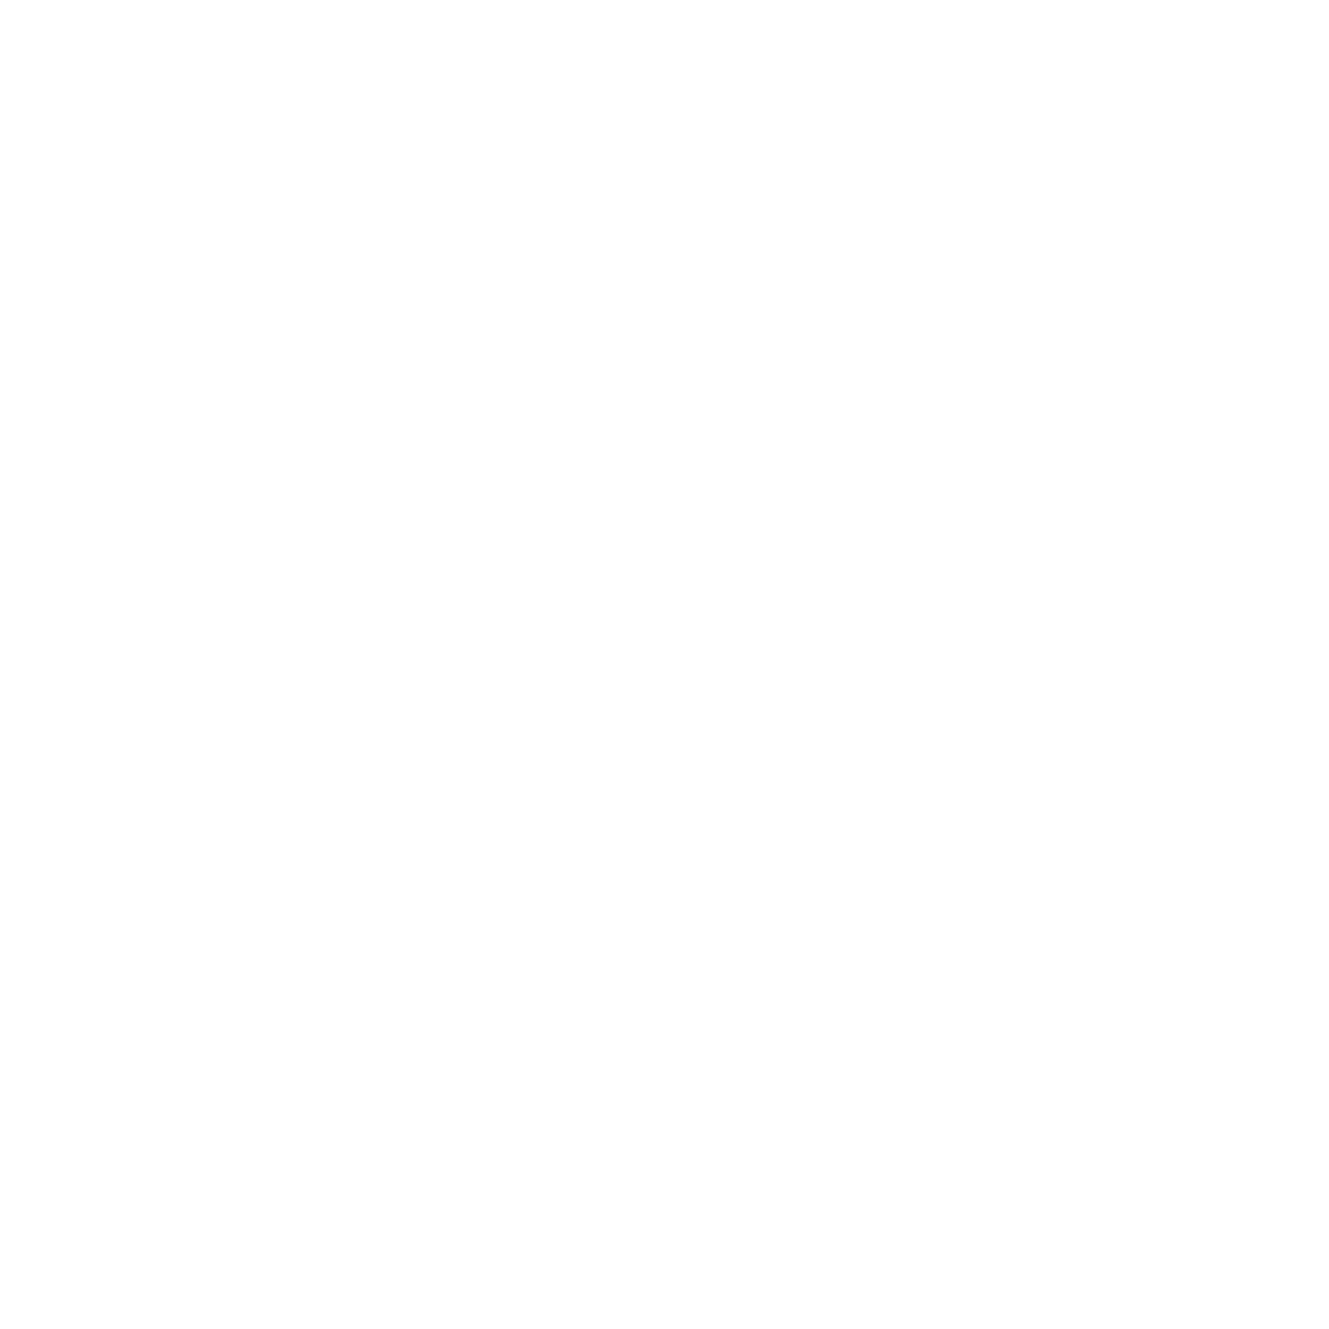

In [150]:
image_path = Path.cwd() / "data/input_ invoice/rotated_image1.jpg"
image = cv2.imread(image_path.as_posix())
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(image)

In [171]:
config_overwrite = [
                    "PT.LAYOUT.WEIGHTS=microsoft/table-transformer-detection/pytorch_model.bin",# TATR table detection model
                    "PT.ITEM.WEIGHTS=microsoft/table-transformer-structure-recognition/pytorch_model.bin",  # TATR table segmentation model
                    "PT.ITEM.FILTER=['table']",
                    "OCR.USE_DOCTR=True",  # we disable Tesseract and use DocTr as OCR engine
                    "OCR.USE_TESSERACT=False"]

In [89]:
# analyzer =dd.get_dd_analyzer(config_overwrite=
#    ["PT.LAYOUT.WEIGHTS=microsoft/table-transformer-detection/pytorch_model.bin",   # TATR table detection model
#     "PT.ITEM.WEIGHTS=microsoft/table-transformer-structure-recognition/pytorch_model.bin",  # TATR table segmentation model
#     "PT.ITEM.FILTER=['table']",
#     "OCR.USE_DOCTR=True",  # we disable Tesseract and use DocTr as OCR engine
#     "OCR.USE_TESSERACT=False",
#                         ])

In [159]:
# config_overwrite = ["LANGUAGE='fre'",
#                     "OCR.USE_DOCTR=True",  # we disable Tesseract and use DocTr as OCR engine
#                     "OCR.USE_TESSERACT=False",
#                     "PT.LAYOUT.FILTER=['figure', 'text', 'list']",
#                     "TEXT_ORDERING.INCLUDE_RESIDUAL_TEXT_CONTAINER=False",
#                     "PT.ITEM.PAD.TOP=0",
#                     "PT.ITEM.PAD.RIGHT=0",
#                     "PT.ITEM.PAD.BOTTOM=0",
#                     "PT.ITEM.PAD.LEFT=0",
#                    ]

In [172]:
analyzer = dd.get_dd_analyzer(config_overwrite=config_overwrite)

[0224 12:57.51 @dd.py:452]  INF  Config: 
 {'DEVICE': 'cpu',
 'LANGUAGE': None,
 'LAYOUT_NMS_PAIRS': {'COMBINATIONS': None, 'PRIORITY': None, 'THRESHOLDS': None},
 'LIB': 'PT',
 'OCR': {'CONFIG': {'TESSERACT': 'dd/conf_tesseract.yaml'},
         'USE_DOCTR': True,
         'USE_TESSERACT': False,
         'USE_TEXTRACT': False,
         'WEIGHTS': {'DOCTR_RECOGNITION': {'PT': 'doctr/crnn_vgg16_bn/pt/crnn_vgg16_bn-9762b0b0.pt',
                                           'TF': 'doctr/crnn_vgg16_bn/tf/crnn_vgg16_bn-76b7f2c6.zip'},
                     'DOCTR_WORD': {'PT': 'doctr/db_resnet50/pt/db_resnet50-ac60cadc.pt',
                                    'TF': 'doctr/db_resnet50/tf/db_resnet50-adcafc63.zip'}}},
 'PT': {'CELL': {'FILTER': None,
                 'WEIGHTS': 'cell/d2_model_1849999_cell_inf_only.pt',
                 'WEIGHTS_TS': 'cell/d2_model_1849999_cell_inf_only.ts'},
        'ITEM': {'FILTER': ['table'],
                 'PAD': {'BOTTOM': 60, 'LEFT': 60, 'RIGHT': 60, 'TO

In [185]:
analyzer = dd.get_dd_analyzer()

[0224 14:03.25 @dd.py:452]  INF  Config: 
 {'DEVICE': 'cpu',
 'LANGUAGE': None,
 'LAYOUT_NMS_PAIRS': {'COMBINATIONS': [['text', 'table'], ['title', 'table'], ['text', 'list'],
                                       ['title', 'list'], ['text', 'title'], ['list', 'table']],
                      'PRIORITY': None,
                      'THRESHOLDS': [0.005, 0.005, 0.542, 0.1, 0.699, 0.01]},
 'LIB': 'PT',
 'OCR': {'CONFIG': {'TESSERACT': 'dd/conf_tesseract.yaml'},
         'USE_DOCTR': True,
         'USE_TESSERACT': False,
         'USE_TEXTRACT': False,
         'WEIGHTS': {'DOCTR_RECOGNITION': {'PT': 'doctr/crnn_vgg16_bn/pt/crnn_vgg16_bn-9762b0b0.pt',
                                           'TF': 'doctr/crnn_vgg16_bn/tf/crnn_vgg16_bn-76b7f2c6.zip'},
                     'DOCTR_WORD': {'PT': 'doctr/db_resnet50/pt/db_resnet50-ac60cadc.pt',
                                    'TF': 'doctr/db_resnet50/tf/db_resnet50-adcafc63.zip'}}},
 'PT': {'CELL': {'FILTER': None,
                 'WEI

In [178]:
# analyze = dd.get_dd_analyzer(path_config_file="")

In [176]:
analyzer.get_pipeline_info()

{0: 'image_Detr',
 1: 'sub_image_Detr',
 2: 'table_transformer_segment',
 3: 'image_doctr_text_detector',
 4: 'text_extract_doctr_text_recognizer',
 5: 'matching',
 6: 'text_order'}

In [96]:
analyzer.pipe_component_list

In [142]:
analyzer.pipe_component_list[2].predictor.possible_categories()

[<LayoutType.cell>]

In [186]:
image_path = Path.cwd() / "data/input_ invoice"

df = analyzer.analyze(path = image_path)  # setting up pipeline
df.reset_state()  # Trigger some initialization, This method must be called just before starting the iteration. It is part of the API.

|                                                                                                                                                                                                          |1/?[00:00<00:00,2220.38it/s]


[0224 14:02.20 @doctectionpipe.py:84]  INF  Processing somavog_page-0001.jpg
[0224 14:02.23 @context.py:126]  INF  ImageLayoutService total: 3.5906 sec.
[0224 14:02.23 @context.py:126]  INF  AnnotationNmsService total: 0.0 sec.
[0224 14:02.23 @context.py:126]  INF  SubImageLayoutService total: 0.0 sec.
[0224 14:02.23 @context.py:126]  INF  SubImageLayoutService total: 0.0 sec.
[0224 14:02.23 @context.py:126]  INF  TableSegmentationService total: 0.0 sec.
[0224 14:02.26 @context.py:126]  INF  ImageLayoutService total: 2.1564 sec.
[0224 14:02.29 @context.py:126]  INF  TextExtractionService total: 3.7896 sec.
[0224 14:02.29 @context.py:126]  INF  MatchingService total: 0.0021 sec.
[0224 14:02.29 @context.py:126]  INF  TextOrderService total: 0.0547 sec.


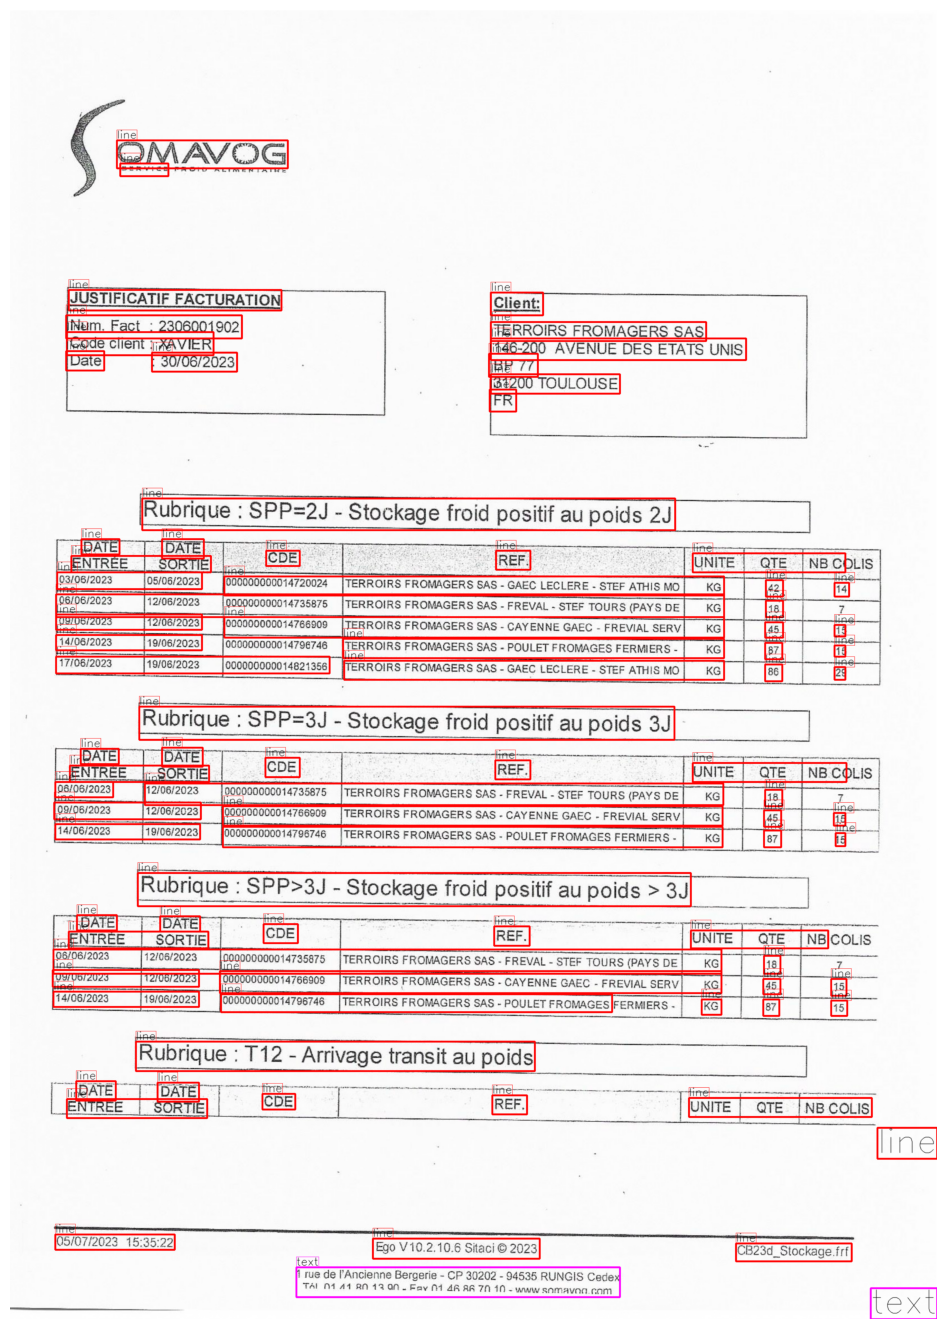

In [184]:
doc = iter(df)
page = next(doc) 

image = page.viz()
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(image)

In [31]:
print(page.text)

John Smith
4490 Oak Drive
Albany, NY 12210
Bill To Jessie M Horne 4312 Wood Road New York, NY 10031
Ship To Jessie M Horne 2019 Redbud Drive New York, NY 10011
Invoice # INT- Date 11/02/2019 P.O.# 2412/2019 Date 26/02/2019
Terms & Conditions Payment is due within 15 days
Name of Bank Account number: 1234567890 Routing: 098765432



In [32]:
for layout in page.layouts:
    if layout.category_name=="title":
        print(f"Title: {layout.text}")

Title: John Smith


In [33]:
page.chunks[0]

('99276cd5-fa33-30e8-8c1b-8b7be5db48f7',
 '99276cd5-fa33-30e8-8c1b-8b7be5db48f7',
 0,
 '0d3c56b6-eafb-3408-af03-f41f30c55539',
 1,
 <LayoutType.title>,
 'John Smith')

In [34]:
len(page.tables)


1

In [35]:
table = page.tables[0]
table.get_attribute_names()

{'bbox',
 'cells',
 'columns',
 'csv',
 <TableType.html>,
 <TableType.item>,
 <TableType.max_col_span>,
 <TableType.max_row_span>,
 'np_image',
 <TableType.number_of_columns>,
 <TableType.number_of_rows>,
 <Relationships.reading_order>,
 'rows',
 'text',
 'words'}

In [36]:
print(f" number of rows: {table.number_of_rows} \n number of columns: {table.number_of_columns} \n reading order: {table.reading_order}")


 number of rows: 7 
 number of columns: 4 
 reading order: None


In [37]:
HTML(table.html)

In [38]:
analyzer.get_pipeline_info()

{0: 'image_weights_layout_d2_model_0829999_layout_inf_only.pt',
 1: 'sub_image_weights_item_d2_model_1639999_item_inf_only.pt',
 2: 'sub_image_weights_cell_d2_model_1849999_cell_inf_only.pt',
 3: 'table_segment',
 4: 'table_segment_refine',
 5: 'image_doctr_text_detector',
 6: 'text_extract_doctr_text_recognizer',
 7: 'matching',
 8: 'text_order'}

In [40]:
analyzer.pipe_component_list

In [49]:
image_layout_service = analyzer.pipe_component_list[0]
image_layout_service.predictor

In [50]:
image_layout_service.predictor.possible_categories()


[<LayoutType.text>,
 <LayoutType.title>,
 <LayoutType.list>,
 <LayoutType.table>,
 <LayoutType.figure>]

In [53]:
match_service = analyzer.pipe_component_list[7]
print(f"parent_categories: {match_service.parent_categories}, child_categories: {match_service.child_categories}")

parent_categories: ['text', 'title', 'list', 'cell', 'column_header', 'projected_row_header', 'spanning', 'row_header'], child_categories: word


In [54]:
print(f"matching_rule: {match_service.matching_rule} \n match_threshold: {match_service.threshold} \n max_parent_only: {match_service.max_parent_only}")

matching_rule: ioa 
 match_threshold: 0.6 
 max_parent_only: True
